In [1]:
# 라이브러리 임포트

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing import sequence
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb


Using TensorFlow backend.


In [2]:
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# seed값 설정

seed=0
numpy.random.seed(seed)
tf.random.set_seed(seed)
tf.random.set_seed(seed)

# 1. 데이터 확인

In [4]:
# 학습셋, 테스트셋 시작하기

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

In [5]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [6]:
print(len(x_train))
print(len(x_test))

25000
25000


# 딥러닝 구조짜기

In [7]:
# 모델 설정

model = Sequential()
model.add(Embedding(1000,100)) # 불러온 단어 수 총 1000개, 그 중 리뷰 당 100개 단어
model.add(Dropout(0.5)) # 과적합 방지
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1)) 

# 필터 수가 64개 -> 특징 추출이 64개를 추출하게 됨
# padding='valid' ->출력 사이즈가 입력사이즈보다 작게 됨
# padding='same'-> 출력 사이즈가 입력 사이즈랑 같게 됨

model.add(MaxPooling1D(pool_size=4))

model.add(LSTM(32))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         100000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

# 모델 컴파일

C:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 16s 639us/step - loss: 0.4890 - accuracy: 0.7464 - val_loss: 0.3846 - val_accuracy: 0.8256
Epoch 2/10
25000/25000 [==============================] - 15s 607us/step - loss: 0.3733 - accuracy: 0.8326 - val_loss: 0.3603 - val_accuracy: 0.8370
Epoch 3/10
25000/25000 [==============================] - 15s 607us/step - loss: 0.3513 - accuracy: 0.8440 - val_loss: 0.3485 - val_accuracy: 0.8436
Epoch 4/10
25000/25000 [==============================] - 15s 607us/step - loss: 0.3309 - accuracy: 0.8553 - val_loss: 0.3467 - val_accuracy: 0.8439
Epoch 5/10
25000/25000 [==============================] - 15s 608us/step - loss: 0.3132 - accuracy: 0.8639 - val_loss: 0.3549 - val_accuracy: 0.8374
Epoch 6/10
25000/25000 [==============================] - 15s 613us/step - loss: 0.2952 - accuracy: 0.8742 - val_loss: 0.3450 - val_accuracy: 0.8461
Epoch 7/10
25000/25000 [==============================] 

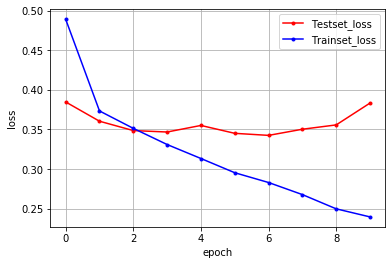

걸린 시간: 2.6320431431134543 minutes
25000/25000 [==============================] - 3s 130us/step

 Test Accuracy: 0.8405


In [8]:
import time
start=time.time()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행

history = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

# 결과출력

print('\n Test Accuracy : %.4f' % (model.evaluate(x_test, y_test)[1]))

# 테스트셋의 오차

y_vloss = history.history['val_loss']

# 학습셋의 오차

y_loss = history.history['loss']

# 그래프의 표현

x_len = numpy.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 레전드 표시 

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 작업 걸린시간 체크

end=time.time()
elapsed_sec = end - start
elapsed_minute = elapsed_sec/60
print("걸린 시간:", elapsed_minute, 'minutes')

# 테스트 정확도 출력

print('\n Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))